<a href="https://colab.research.google.com/github/tuba89/MachineLearning/blob/main/knn_with_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Handle Data

In [ ]:
import csv
with open('iris.data', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))


In [ ]:
# # Split the data into training & testing data
import csv
import random

def loadDataset(filename, split, trainingSet = [], testSet = []):

    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)

        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])

            if random.random() < split:
                trainingSet.append(dataset[x])

            else:
                testSet.append(dataset[x])

In [ ]:
# test the function out with our iris dataset

trainingSet = []
testSet = []

loadDataset('iris.data', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 100
Test: 49


# 2. Similarity

In [ ]:
import math

def euclideanDistance(instance1, instance2, length):
    #Complete the function
    distance = 0
    for x in range(length):
        distance += pow( (instance1[x] - instance2[x]), 2 )
    return math.sqrt(distance)

In [ ]:
# test this function with some sample data
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)
print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


# 3. Neighbors

In [ ]:
import operator

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1

    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []

    for x in range(k):
        neighbors.append(distances[x][0])

    return neighbors

In [ ]:
# We can test out this function as follows:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)

[[4, 4, 4, 'b']]


# 4. Response

In [ ]:

def getResponse(neighbors):
    classVotes = {}

    for x in range(len(neighbors)):
        response = neighbors[x][ -1 ] #complete with appropriate number

        if response in classVotes:
            #Complete the if clause
            classVotes[response] += 1
        else:
             classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key = operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [ ]:
#test out this function with some test neighbors
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)
print(response)

a


# 5. Accuracy

In [ ]:
def getAccuracy(testSet, predictions):
    #Complete the function
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
        
    return (correct/float(len(testSet))) * 100.0

In [ ]:
#We can test this function with a test dataset and predictions, as follows:

testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


# 6. Main

In [ ]:
def main():
    trainingSet= []
    testSet= []
    split = 0.66
    loadDataset('iris.data', split, trainingSet, testSet)
    print ("Training set is = " + repr(len(trainingSet)))
    print ("Test set is = " + repr(len(testSet)))    
    predictions=[]
    k = 3 # odd number

    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)

        print('--> predicted:' + repr(result) + '==> # actual = ' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print ('\nThe Accuracy is = ', accuracy)

main()

Training set is = 91
Test set is = 58
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predicted:'Iris-setosa'==> # actual = 'Iris-setosa'
--> predic

# 7. Another distance metric

* Reloading reading and splitting the dataset again just for clarity and simplicity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# reloding dataset
path = "/content/drive/MyDrive/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# Read dataset to pandas dataframe
dataset = pd.read_csv(path, names= names)

In [ ]:
# split dataset into its attributes(features) & labels (target)
x = dataset.iloc[:, :-1].values         #  X = the first four columns of the dataset 
y = dataset.iloc[:, 4].values           #  y = target


In [ ]:
# Train//Test split
from sklearn.model_selection import train_test_split
#20% = (30records) test & 80% train (120 records)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import  ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')

*  Evaluating estimator performance (Cross-validation)

In [ ]:

cross_val = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) 
# --> here The ShuffleSplit will generate 
# --> a user defined number of independent train / test dataset splits
# Samples are 1st shuffled(mélangés) & split into a pair of train / test sets
clf_knn = make_pipeline(preprocessing.StandardScaler(), 
                        KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski'))
scores_knn = cross_val_score(clf_knn, x, y, cv = cross_val)

print("Accuracy of KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std()))

Accuracy of KNN: 0.95 (+/- 0.03)


In [ ]:
from sklearn import metrics

#initialize vector for storing accuracies
vec1 = []
vec2 = []
vec3 = []

#determine a range of k-values to be explored
k_range = list(range(1, 50))

In [ ]:
#loop over k-range, by unsing the three different distance methods
for i in k_range:
    knn1 = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = i, p = 1))
    scores_knn1 = cross_val_score(knn1, x, y, cv = cross_val)
    vec1.append(scores_knn1.mean())

    knn2 = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = i, p = 2))
    scores_knn2 = cross_val_score(knn2, x, y, cv = cross_val)
    vec2.append(scores_knn2.mean())

    knn3 = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = i, p = 3))
    scores_knn3 = cross_val_score(knn3, x, y, cv = cross_val)
    vec3.append(scores_knn3.mean())

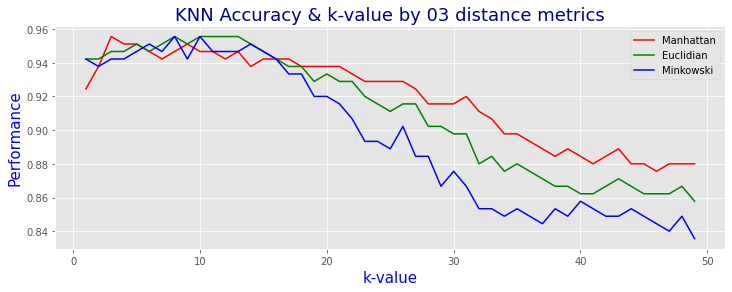

In [ ]:
#plotting accuracy with the three distance metrics
plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
plt.plot(k_range, vec1, c = 'r', label = 'Manhattan')
plt.plot(k_range, vec2, c = 'g', label = 'Euclidian')
plt.plot(k_range, vec3, c = 'b', label = 'Minkowski')

plt.legend()
plt.title('KNN Accuracy & k-value by 03 distance metrics', fontsize=18, color="darkblue")
plt.ylabel('Performance', color="b", fontsize=15)
plt.xlabel('k-value', color="b", fontsize=15)
#plt.grid()

plt.show()

In [ ]:
#y_pred = knn1.predict(x_test)
clf = clf_knn_1.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

* Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  0]
 [ 0  3  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.73      1.00      0.84         8
 Iris-virginica       1.00      0.75      0.86        12

       accuracy                           0.90        30
      macro avg       0.91      0.92      0.90        30
   weighted avg       0.93      0.90      0.90        30



* Comparing Error Rate with the K Value

In [ ]:
# to find the best value of K is to plot the graph of K value
# & error rate for the dataset.
# i plot the mean error for predicted values of test set for all the k-values between 1 & 40.
error = []

# Calculating error for K values between 1 & 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

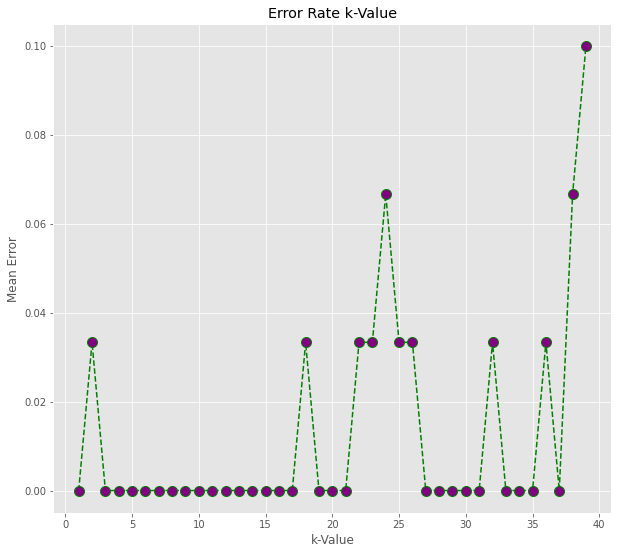

In [ ]:
# plot the error values against k-values
plt.figure(figsize=(10, 9))
plt.plot(range(1, 40), error, color='g', linestyle='dashed', marker='o',
         markerfacecolor='purple', markersize=10)
plt.title('Error Rate k-Value')
plt.xlabel('k-Value')
plt.ylabel('Mean Error')

* From the plot we can see that the mean error is "0" when the value of the K is between 3 and 17, and between 19 and 21, and between 27&31 etc ...